# Sunspots
Pobierz dane z dziennymi obserwacjami plam słonecznych.
Wczytaj dane do ramki Pandas.
Skonfiguruj indeks ramki danych, aby był złożony z obiektów datetime reprezentujących daty obserwacji.
Pokaż na przykładach jak działają metody resample i rolling.
Wykorzystaj metodę rolling do dekompozycji szeregu na część sezonalną, trend i szum:
  Sunspot = Trend + Sezonowość + Szum
Wyświetl uzyskane w ten sposób szeregi na czterech wykresach (Sunspot, Trend, Sezonowość, Szum) ze wspólną osią czasu.

https://www.sidc.be/SILSO/INFO/sndtotcsv.php
<br>
https://www.sidc.be/SILSO/infosndtot

In [124]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt


In [125]:
df = pd.read_csv('https://www.sidc.be/SILSO/INFO/sndtotcsv.php', sep = ';', header = None, names = ['year', 'month', 'day', 'dec_year', 'daily_sunspot', 'std', 'no_observations', 'indicator'], na_values = ['-1'])

In [126]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.set_index('date')

In [127]:
df

,year,month,day,dec_year,daily_sunspot,std,no_observations,indicator
date,,,,,,,,
1818-01-01,1818,1,1,1818.001,-1,NaN,0,1
1818-01-02,1818,1,2,1818.004,-1,NaN,0,1
1818-01-03,1818,1,3,1818.007,-1,NaN,0,1
1818-01-04,1818,1,4,1818.010,-1,NaN,0,1
1818-01-05,1818,1,5,1818.012,-1,NaN,0,1
...,...,...,...,...,...,...,...,...
2023-05-27,2023,5,27,2023.401,139,12.3,43,0
2023-05-28,2023,5,28,2023.404,146,14.4,39,0
2023-05-29,2023,5,29,2023.407,157,15.1,40,0


In [128]:
df = df[df.year > df[df.daily_sunspot == -1].year.max()] 

In [135]:
trend_window = 3650
trend =  df['daily_sunspot'].rolling(window=trend_window).mean()
seasonality = df.groupby(np.arange(len(df)) % trend_window)['daily_sunspot'].transform('mean')
residuals = df['daily_sunspot'] - trend - seasonality


In [149]:
df.daily_sunspot.shape == trend.shape == seasonality.shape

True

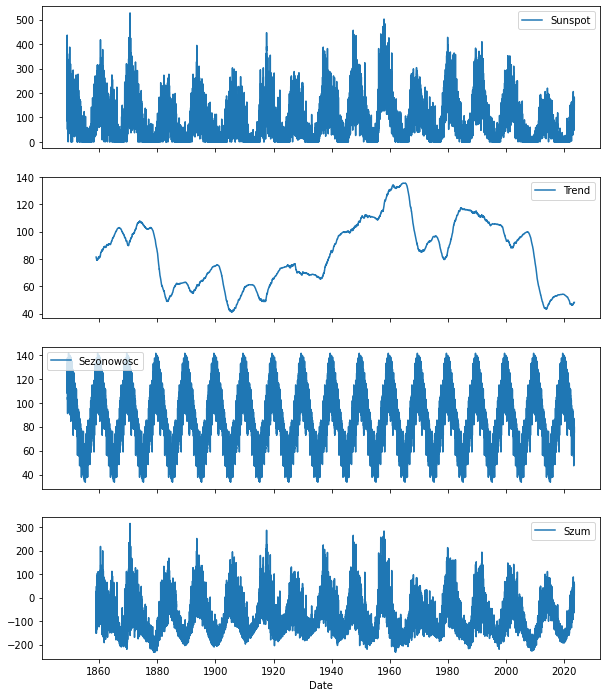

In [148]:
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

axs[0].plot(df.index, df['daily_sunspot'], label='Sunspot')
axs[0].legend()

axs[1].plot(df.index, trend, label='Trend')
axs[1].legend()

axs[2].plot(df.index, seasonality, label='Sezonowosc')
axs[2].legend()

axs[3].plot(df.index, residuals, label='Szum')
axs[3].legend()

plt.xlabel('Date')
plt.show()